    product  total_qty    revenue
0  Keyboard         29    23770.0
1    Laptop         20  1009500.0
2   Monitor         15   149000.0
3     Mouse         45    21350.0


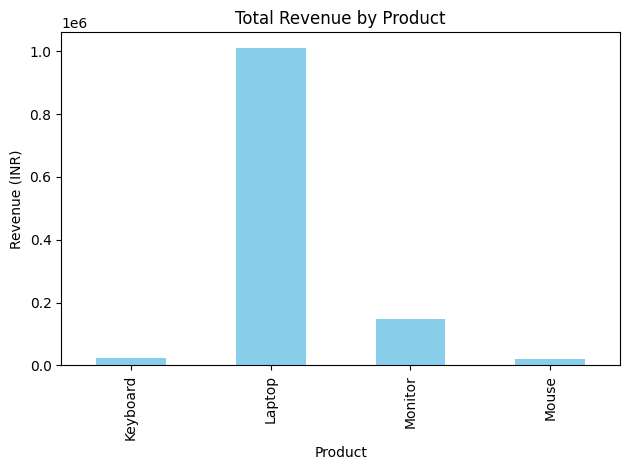

In [1]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

data = [
    ('Laptop', 5, 50000), ('Mouse', 10, 500), ('Keyboard', 7, 800), ('Monitor', 3, 10000),
    ('Laptop', 2, 52000), ('Mouse', 8, 450), ('Keyboard', 5, 850), ('Monitor', 2, 9800),
    ('Laptop', 4, 51000), ('Mouse', 9, 470), ('Keyboard', 6, 830), ('Monitor', 5, 9700),
    ('Laptop', 3, 49500), ('Mouse', 6, 460), ('Keyboard', 8, 810), ('Monitor', 1, 10500),
    ('Laptop', 6, 50500), ('Mouse', 12, 480), ('Keyboard', 3, 820), ('Monitor', 4, 10100)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()

print(df)

df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Total Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

